In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import precision_score,recall_score,f1_score

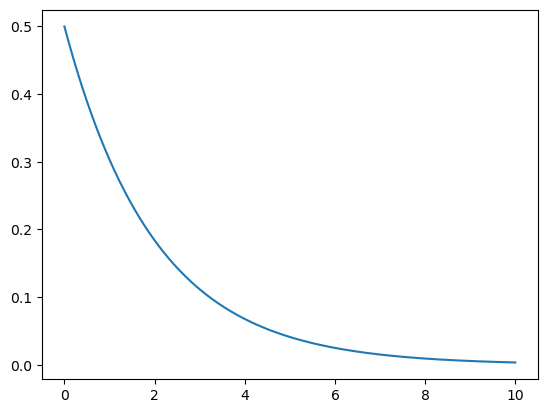

In [6]:
def chi_square(x):
    return np.exp(-x/2)/(2)
X = np.linspace(0,10,1000)
plt.plot(X, chi_square(X))

In [2]:
df = pd.read_csv('diabetes.csv')
X = df[df.columns[0:-1]]
y = df[df.columns[-1]]
print(len(df))

768


C:\Users\pedro\AppData\Local\Temp\ipykernel_23316\2955651608.py:27: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


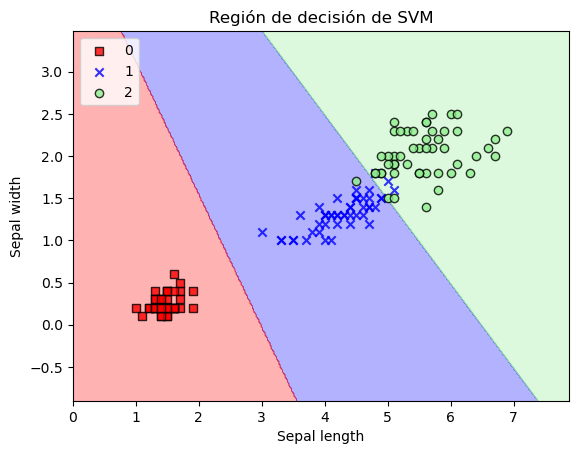

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Configurar el mapa de colores
    from matplotlib.colors import ListedColormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Graficar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar ejemplos
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

# Cargar un conjunto de datos de ejemplo (iris)
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Tomar solo las dos primeras características para poder graficar en 2D
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un clasificador (SVM en este caso)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Graficar las regiones de decisión
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Región de decisión de SVM')
plt.legend(loc='upper left')
plt.show()


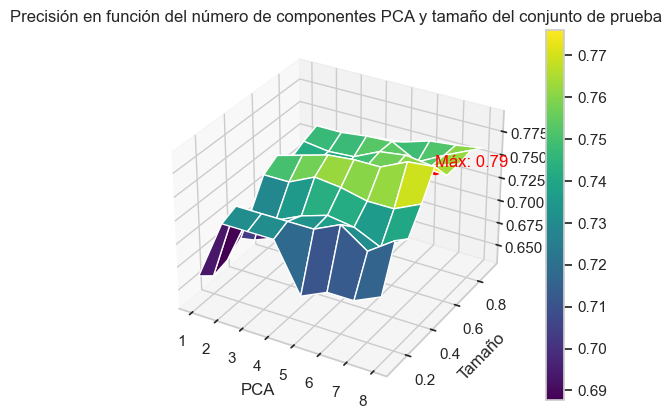

Mejor número de componentes PCA: 8
Mejor tamaño del conjunto de prueba: 0.5


In [11]:
from classifierLR import LogisticRegression
from busqueda_acc_pca_tamaño import busqueda_tamano_pca
# help(classifierLogisticRegression)
clf = LogisticRegression()#classifierLogisticRegression(X, y, samp_size=0.2, params=None, accuracy_solicitado=0.9)

mejor_pca, mejor_size = busqueda_tamano_pca(clf, X, y,
                                             pca=[i for i in range(1,8+1)],
                                             size=[i/10 for i in range(1,10)],tamano_random=1)
print(f"Mejor número de componentes PCA: {mejor_pca}")
print(f"Mejor tamaño del conjunto de prueba: {mejor_size}")


In [7]:
cols = df.columns
for col in cols:
    print(col, df[col].isna().any())

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


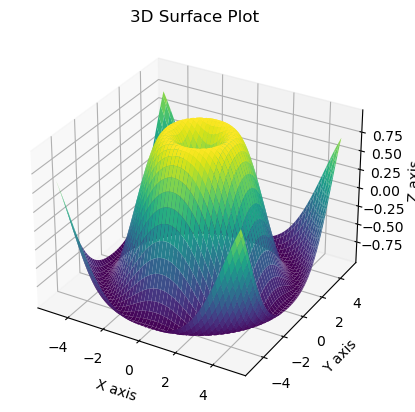

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear los datos
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Crear la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
ax.plot_surface(X, Y, Z, cmap='viridis')

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Título
ax.set_title('3D Surface Plot')

# Mostrar la gráfica
plt.show()


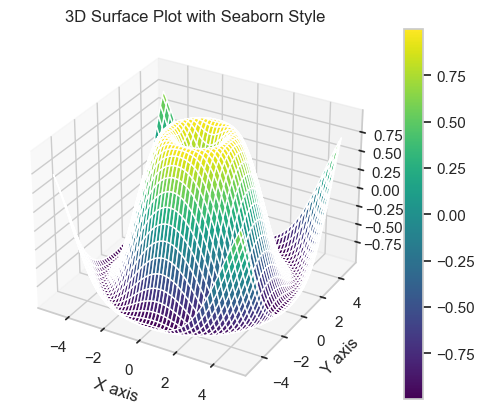

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Establecer el estilo de Seaborn
sns.set(style="whitegrid")
# Crear los datos
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Crear la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Añadir barra de color
fig.colorbar(surf)

# Etiquetas de los ejes
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Título
ax.set_title('3D Surface Plot with Seaborn Style')

# Mostrar la gráfica
plt.show()


c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


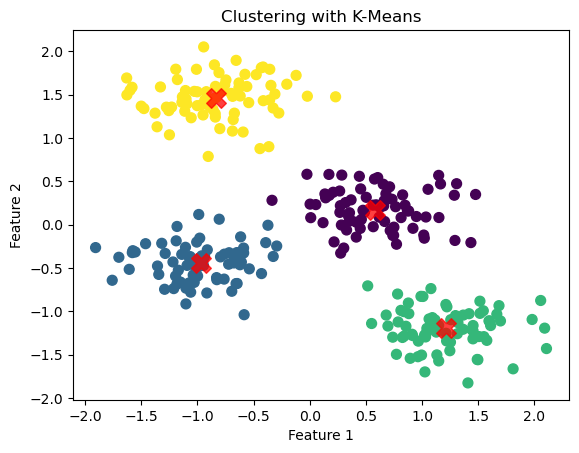

In [8]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Generar datos de ejemplo
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)

# Predecir las etiquetas de los clusters
y_kmeans = kmeans.predict(X_scaled)

# Visualización de los resultados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title('Clustering with K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
lr_l2 = LogisticRegression(max_iter=1000)#penalty= 'l1', solver='saga')
modelo1 = lr_l2.fit(X_train,y_train)
y_in1 = modelo1.predict(X_train)
y_m1 = modelo1.predict(X_test)
intercepto_1 = modelo1.intercept_[0]
print(f'Intercepto: {intercepto_1}\n')
parametros_1 = modelo1.coef_
print(f'Parámetros:\n')
for i in range(len(X.columns)):
    print(f'{X.columns[i]}:',round(parametros_1[0][i],3))
acc_1_in = metrics.accuracy_score(y_in1,y_train)
print(f'\nAccuracy in: {round(acc_1_in, 4)}\n')
acc_1_out = metrics.accuracy_score(y_m1,y_test)
print(f'Accuracy out: {round(acc_1_out, 4)}\n')
# graficar_matriz_confusion(y_test, y_m1)

NameError: name 'LogisticRegression' is not defined

In [ ]:
df = pd.read_csv('diabetes.csv')

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

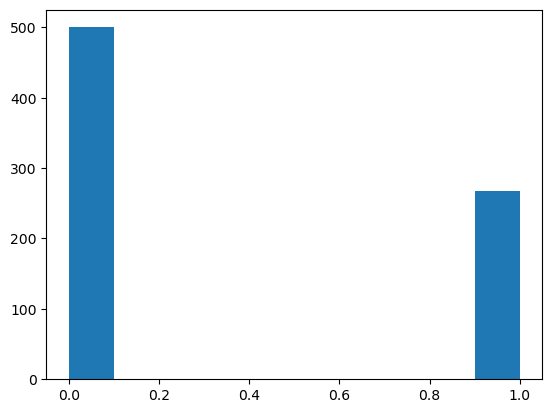

In [ ]:
clase = df[df.columns[-1]]
plt.hist(clase)

In [ ]:
sum(clase)/len(clase)

0.3489583333333333

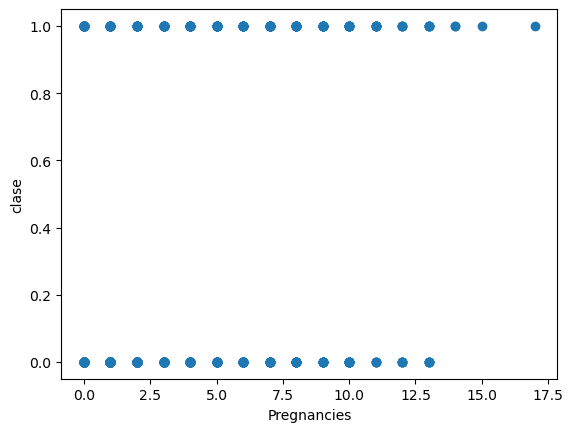

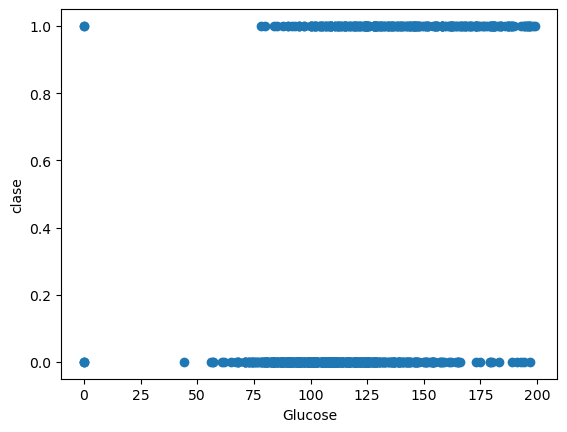

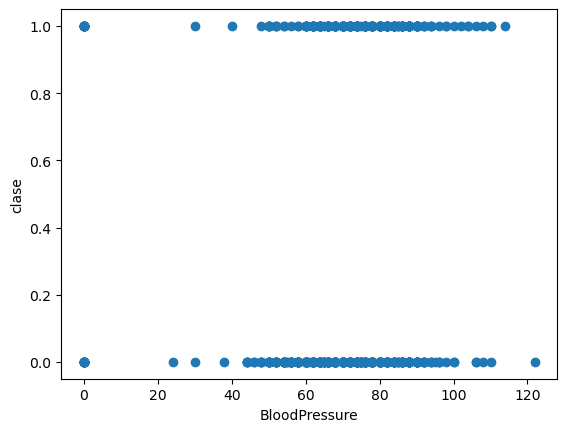

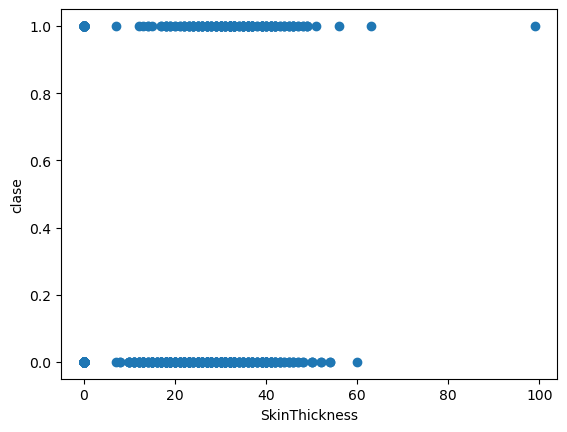

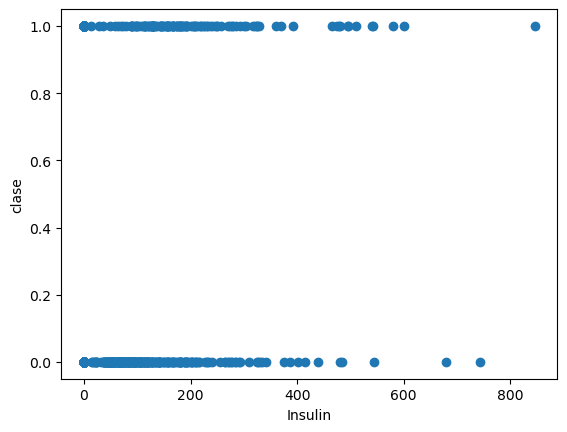

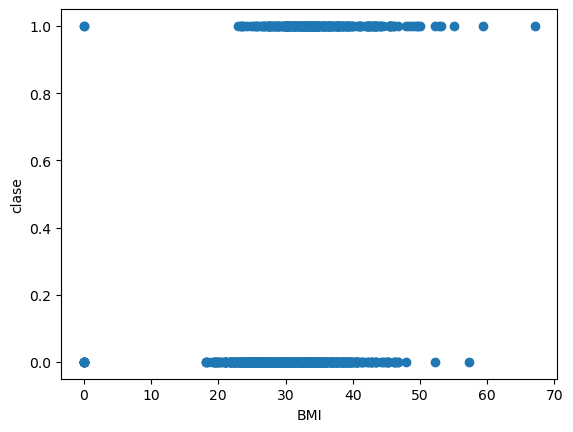

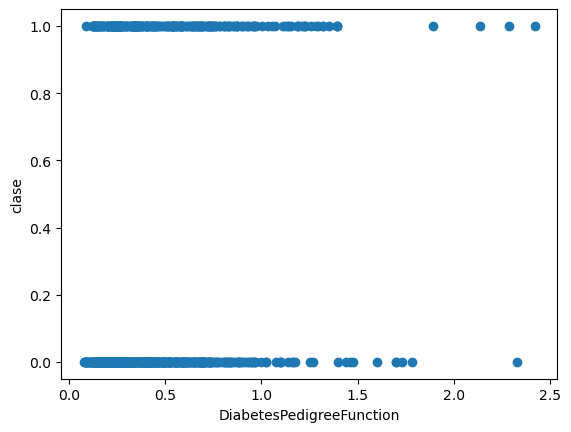

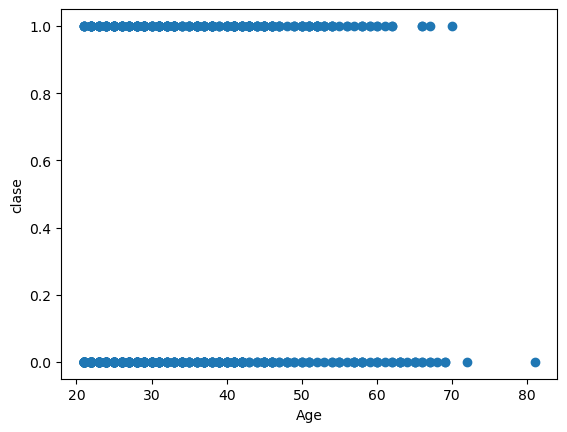

In [ ]:
for col in df.columns[0:-1]:
    plt.scatter(df[col],clase)
    plt.xlabel(col)
    plt.ylabel('clase')
    plt.show()

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
lm = LogisticRegression()
X = df[df.columns[0:-1]]
y = df[df.columns[-1]].values
X_train, X_test, y_train , y_test = train_test_split(X,y,
                                                     test_size=0.2,
                                                     random_state=1)
print('Proporcionalidad datos de prueba:',sum(y_test)/len(y_test),
      '\nProporcionalidad datos de entrenamiento:', sum(y_train)/len(y_train),
       '\nProporcionalidad datos en general: ', sum(y)/len(y))

Proporcionalidad datos de prueba: 0.35714285714285715 
Proporcionalidad datos de entrenamiento: 0.3469055374592834 
Proporcionalidad datos en general:  0.3489583333333333


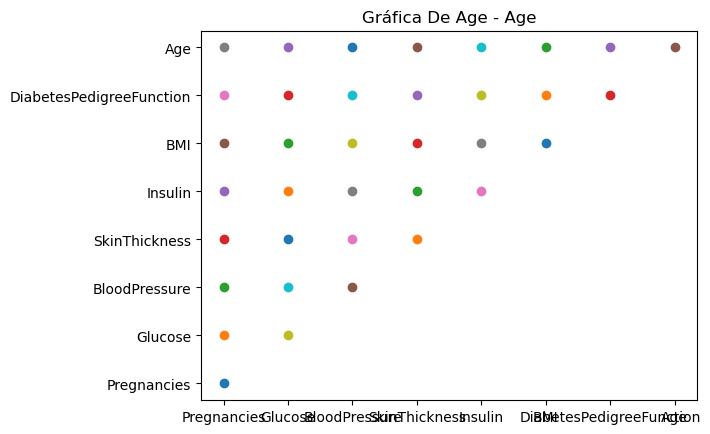

In [ ]:
graficar_caracteristicas(X)

In [ ]:


lr_l2 = LogisticRegression(max_iter=1000)#penalty= 'l1', solver='saga')
modelo1 = lr_l2.fit(X_train,y_train)
y_in1 = modelo1.predict(X_train)
y_m1 = modelo1.predict(X_test)
intercepto_1 = modelo1.intercept_[0]
print(f'Intercepto: {intercepto_1}\n')
parametros_1 = modelo1.coef_
print(f'Parámetros:\n')
for i in range(len(X.columns)):
    print(f'{X.columns[i]}:',round(parametros_1[0][i],3))
acc_1_in = metrics.accuracy_score(y_in1,y_train)
print(f'\nAccuracy in: {round(acc_1_in, 4)}\n')
acc_1_out = metrics.accuracy_score(y_m1,y_test)
print(f'Accuracy out: {round(acc_1_out, 4)}\n')
# graficar_matriz_confusion(y_test, y_m1)


Intercepto: -8.105023563041843

Parámetros:

Pregnancies: 0.127
Glucose: 0.036
BloodPressure: -0.015
SkinThickness: -0.002
Insulin: -0.001
BMI: 0.087
DiabetesPedigreeFunction: 0.64
Age: 0.011

Accuracy in: 0.7785

Accuracy out: 0.7792



In [ ]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X1, X2, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X1.min() - 1, X1.max() + 1
    x2_min, x2_max = X2.min() - 1, X2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    # for idx, cl in enumerate(np.unique(y)):
    #     plt.scatter(x=X[y == 0, 0], y=X[y == 1, 1],
    #                 alpha=0.8, c=cmap(idx),
    #                 marker=markers[idx], label=cl)

c:\Users\pedro\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

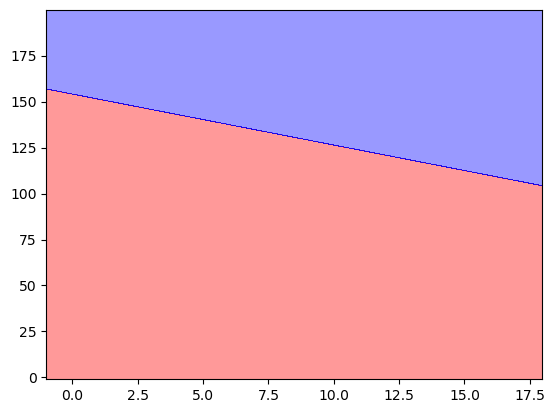

In [ ]:
X1 = X[X.columns[0]]
X2 = X[X.columns[1]]
plot_decision_regions(X1, X2, y, lr_l2, resolution=0.02)

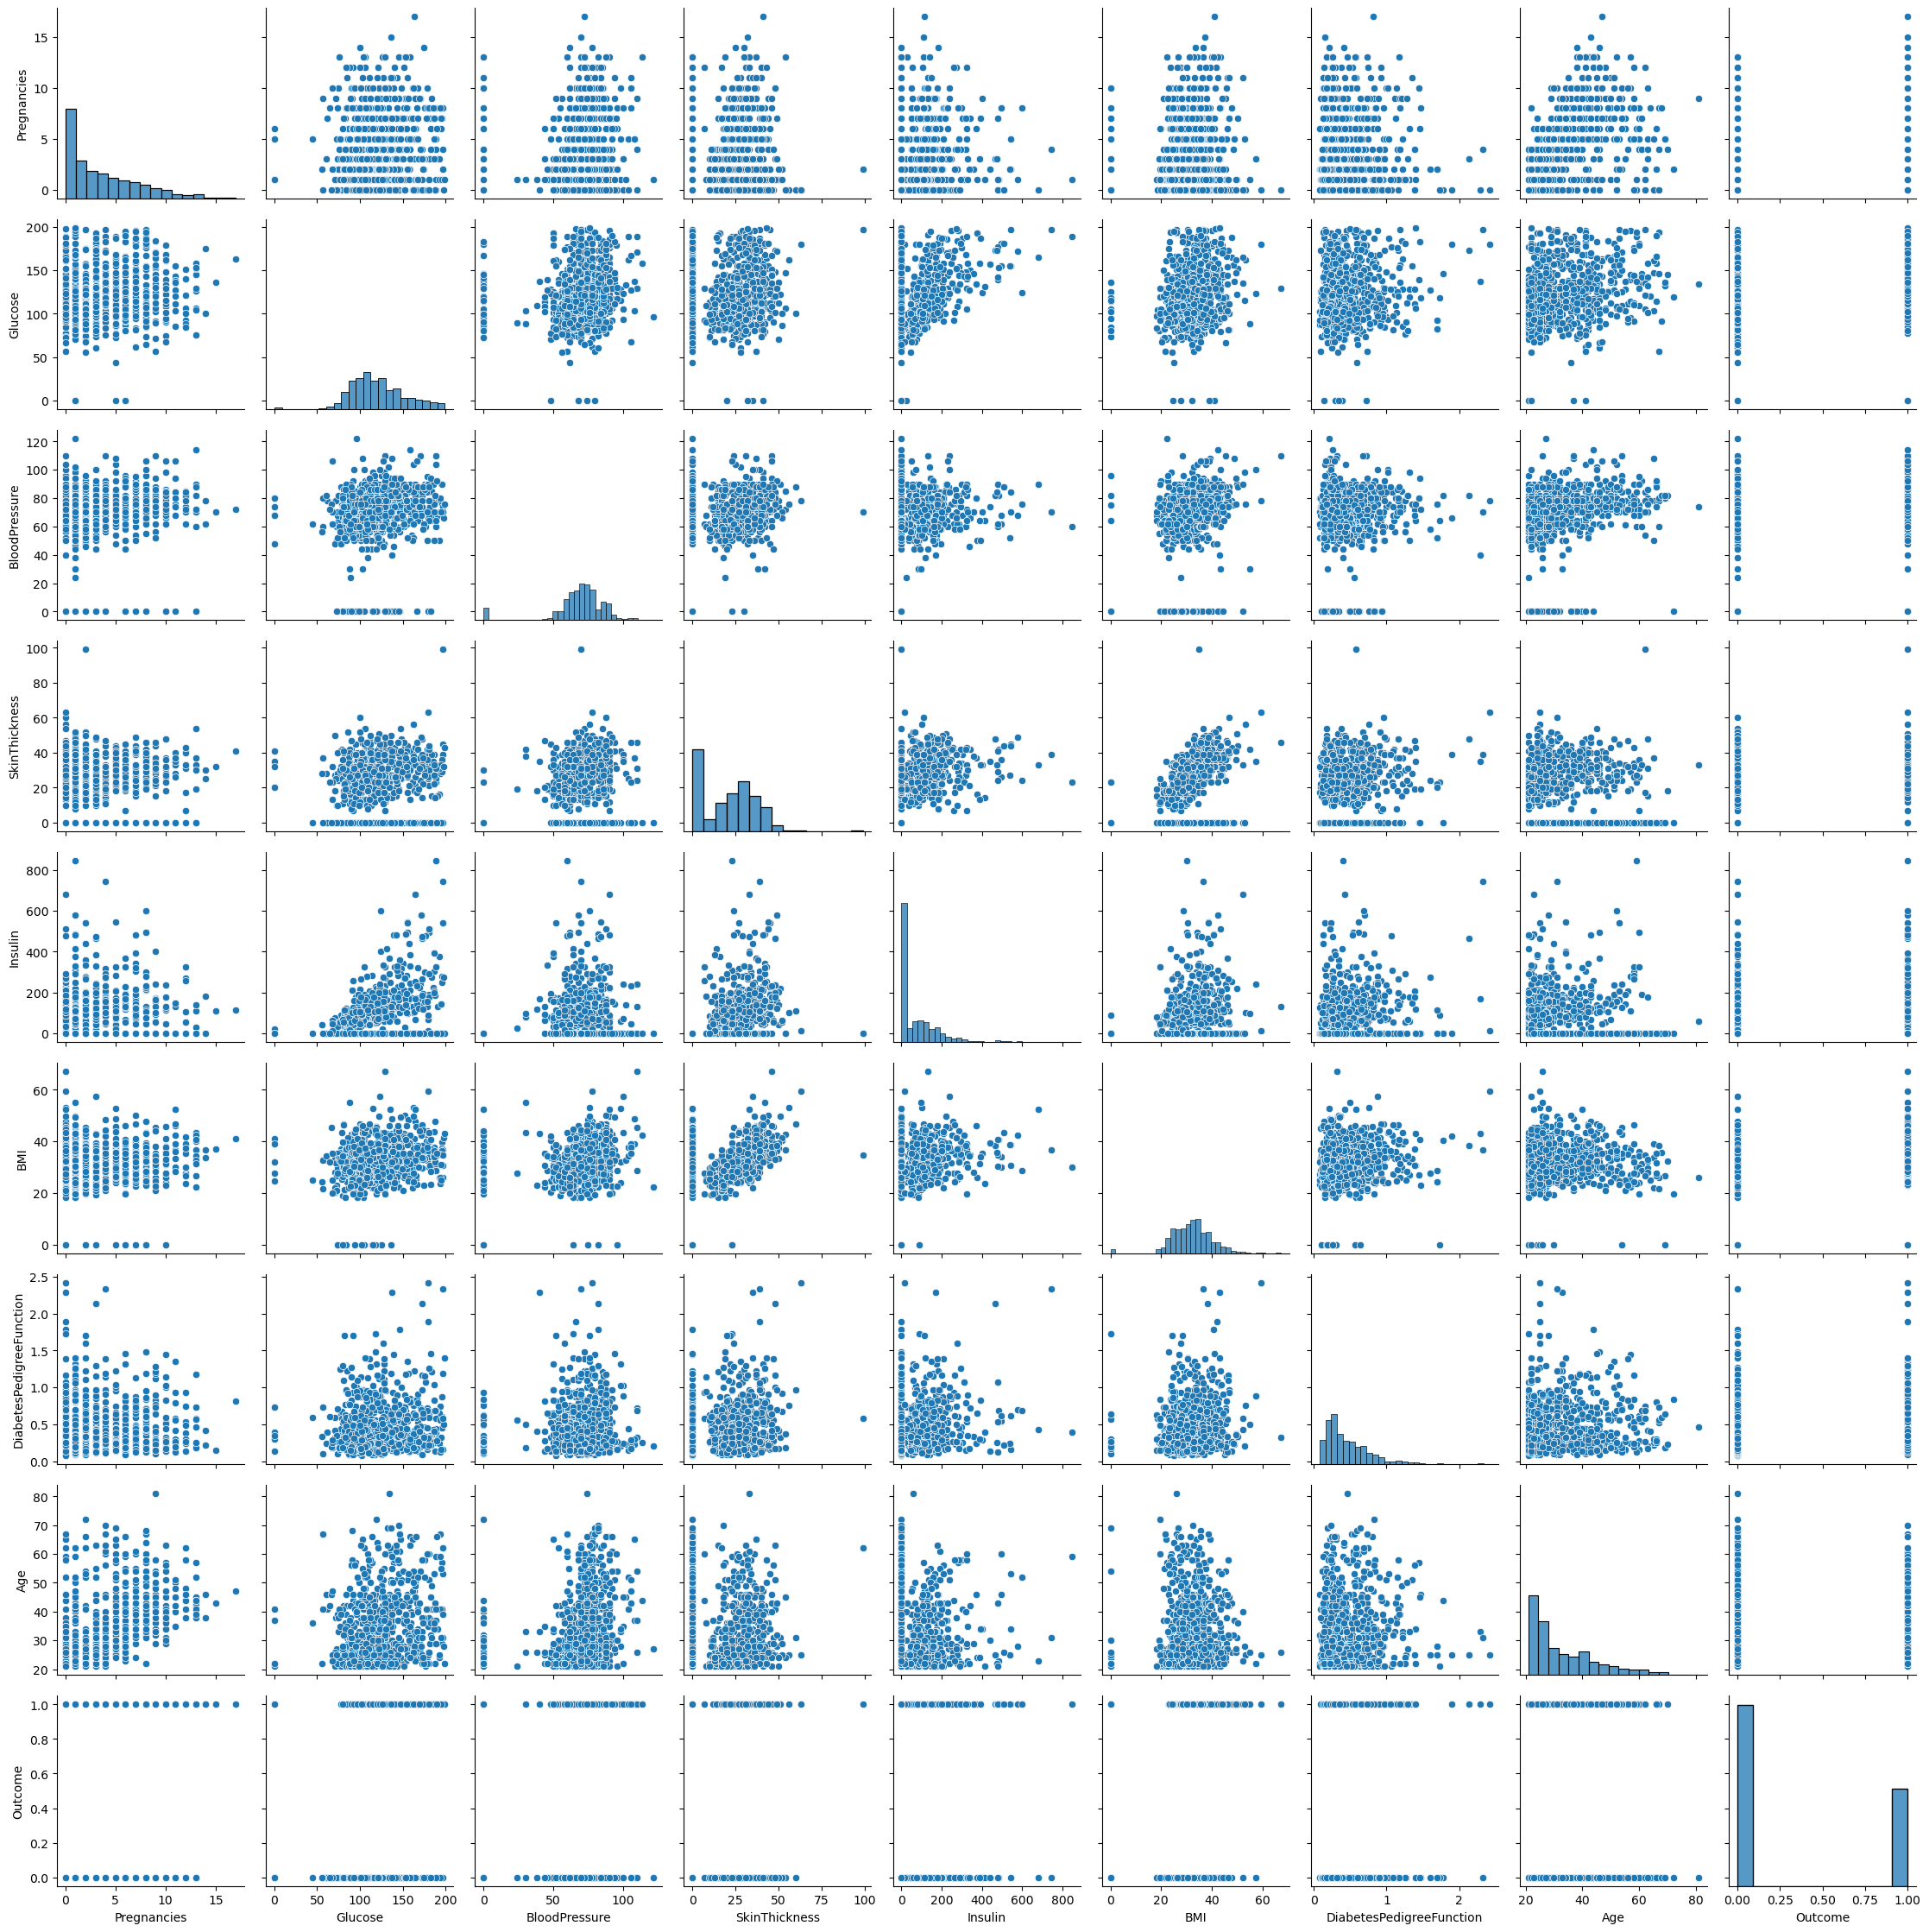

In [11]:
import seaborn as sns
cols = df.columns
sns.pairplot(df[cols])
plt.tight_layout()

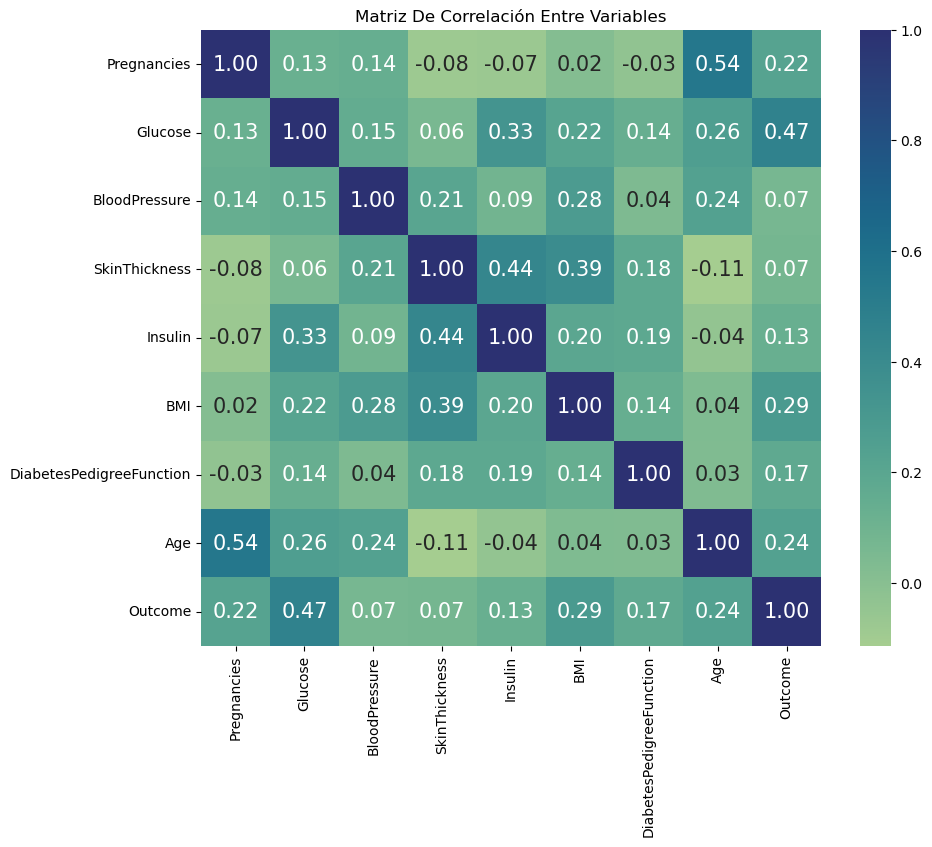

In [ ]:
# Haciendo la matriz de correlación de las características
matriz = np.array(df.corr())
abs_matriz = abs(matriz)
corr_matrix = matriz #abs_matriz
plt.figure(figsize=(10, 8))
h_m = sns.heatmap(corr_matrix,
                  cbar = True,
                  annot = True,
                  fmt = '.2f',
                  annot_kws = {'size':15},
                  yticklabels = cols,
                  xticklabels = cols,
                  cmap = 'crest')
plt.title('Matriz de correlación entre variables'.title())
plt.show()

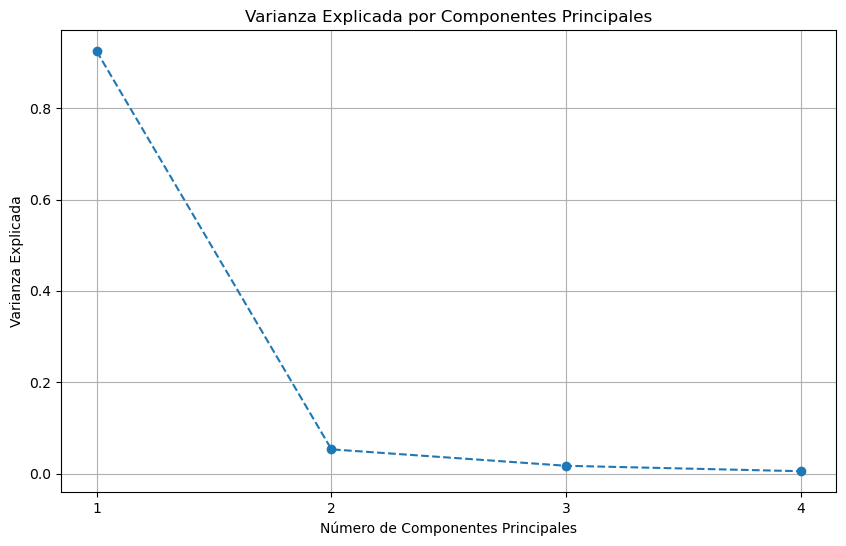

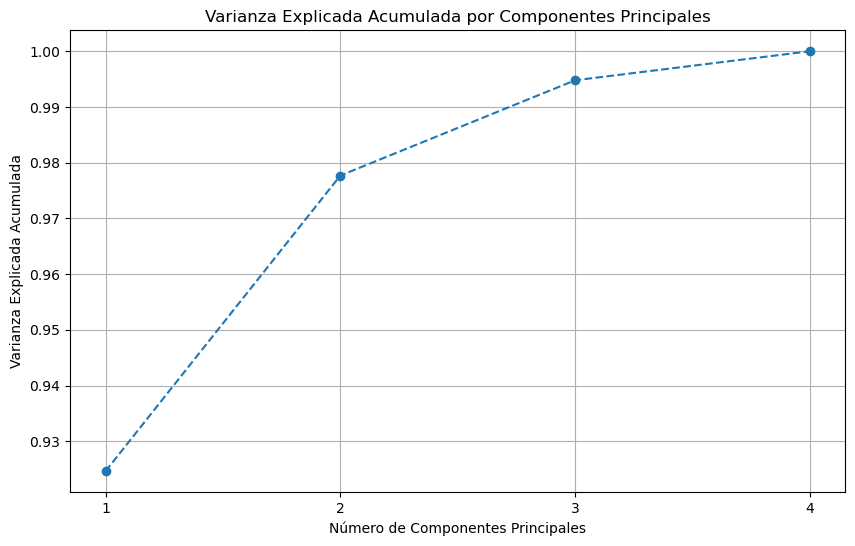

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Cargar el conjunto de datos (en este caso, el dataset de Iris)
data = load_iris()
X = data.data

# Realizar PCA
pca = PCA()
pca.fit(X)

# Obtener la varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()

# Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid()
plt.show()



Eigenvalues 
[2.93808505 0.9201649  0.14774182 0.02085386]


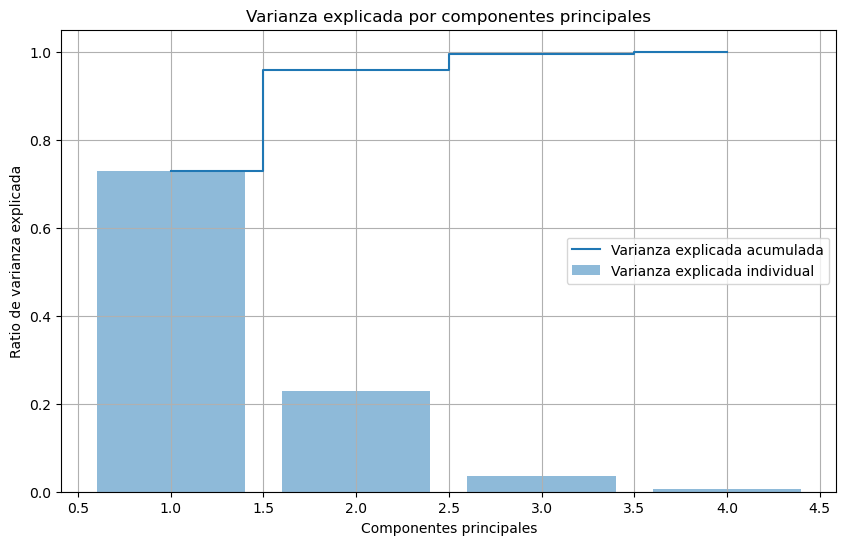

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos (puedes reemplazar esto con tus propios datos)
data = load_iris()
X = data.data

# Estandarizar los datos
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X)

# Calcular la matriz de covarianza
cov_mat = np.cov(X_train_std.T)

# Calcular valores y vectores propios
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)

# Calcular la varianza explicada
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='Varianza explicada acumulada')
plt.ylabel('Ratio de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Varianza explicada por componentes principales')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
cols = df.columns
rango = range(len(cols))
pares = []
for i in rango:
    for j in rango:
        col1,col2 = cols[i],cols[j]
        par = (col1,col2)
        if (col2 , col1) in pares:
            continue
        else:
            pares.append(par)             
            valor =matriz[i][j] 
            if abs(valor) >= .1 and valor != 1:
                if valor < 0:
                    print(f'\n-. Las variables {col1}, {col2} tienen una correlación negativa de valor: {round(valor, 3)}\n')
                else:
                    print(f'\n-. Las variables {col1}, {col2} tienen una correlación positiva de valor: {round(valor, 3)}\n')




-. Las variables Pregnancies, Glucose tienen una correlación positiva de valor: 0.129


-. Las variables Pregnancies, BloodPressure tienen una correlación positiva de valor: 0.141


-. Las variables Pregnancies, Age tienen una correlación positiva de valor: 0.544


-. Las variables Pregnancies, Outcome tienen una correlación positiva de valor: 0.222


-. Las variables Glucose, BloodPressure tienen una correlación positiva de valor: 0.153


-. Las variables Glucose, Insulin tienen una correlación positiva de valor: 0.331


-. Las variables Glucose, BMI tienen una correlación positiva de valor: 0.221


-. Las variables Glucose, DiabetesPedigreeFunction tienen una correlación positiva de valor: 0.137


-. Las variables Glucose, Age tienen una correlación positiva de valor: 0.264


-. Las variables Glucose, Outcome tienen una correlación positiva de valor: 0.467


-. Las variables BloodPressure, SkinThickness tienen una correlación positiva de valor: 0.207


-. Las variables BloodPressure

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df1 = pd.read_csv('diabetes.csv')
# Definir la variable dependiente
y1 = df1[df1.columns[-1]]

# Definir las variables independientes (suponiendo que todas las demás columnas son variables independientes)
X1 = df1.drop(columns=df1.columns[-1])

# Agregar una constante para el intercepto
X1 = sm.add_constant(X1)

# Ajustar el modelo de regresión logística
logit_model = sm.Logit(y1, X1)
result = logit_model.fit()

# Resumen del modelo
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 21 May 2024   Pseudo R-squ.:                  0.2718
Time:                        23:01:50   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4047      0.717    -11.728      0.000      -9.809

In [ ]:
print(f'Parámetros:\n')
for i in range(len(X.columns)):
    print(f'{X.columns[i]}:',round(parametros_1[0][i],3))

Parámetros:

Pregnancies: 0.127
Glucose: 0.036
BloodPressure: -0.015
SkinThickness: -0.002
Insulin: -0.001
BMI: 0.087
DiabetesPedigreeFunction: 0.64
Age: 0.011


In [ ]:
result.params

const                      -8.404696
Pregnancies                 0.123182
Glucose                     0.035164
BloodPressure              -0.013296
SkinThickness               0.000619
Insulin                    -0.001192
BMI                         0.089701
DiabetesPedigreeFunction    0.945180
Age                         0.014869
dtype: float64

In [ ]:
#OBJETIVO PRINCIPAL: OPTIMIZAR EL RENDIMIENTO DE CLASIFICACIÓN


#TRATAR CON EL DESEQUILIBRIO DE CLASES
#ver las otras métricas de evaluación de un modelo de ML, que se haga un reporte completo
#LA VALIDACIÓN CRUZADA ASEGURA UNA MEJOR EVALUACIÓN DEL MODELO, DADA LA POCA CANTIDAD DE DATOS
#ver analizar mejorías en el rendimiento por medio de búsqueda de hiperparámetros
#compresion de datos por medio de la reducción de dimensionalidad
#darle una explicabilidad estadística a los coeficientes estimados para compararlos 
#comparar la separabilidad entre la regresion logistica y SVM 
#mejora la clasificación por medio de la utilización de Kernels?
#comparar la asignación por medio de probabilidades entre Naive Bayes y RL 
#qué funciona mejor, Analisis de componentes principales o analisis de discriminante lineal?
#ver depuracion de algoritmos 
#mejora la clasificación con combinación de modelos
#Crear arboles de decisión para saber si es mejor que una regresión logística o SVM